In [24]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

folder_path = r"D:\SkinCancerPrediction\Preprocessed\TestImage"

images = []

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)


print(f"{len(images)} images loaded from {folder_path}")


29 images loaded from D:\SkinCancerPrediction\Preprocessed\TestImage


In [25]:
from PIL import Image
from torchvision import datasets, transforms

def image_augmentation(image):
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    augmented_images = []

    pil_img = Image.fromarray(img)
    augmented_img = transform(pil_img)
    augmented_images.append(augmented_img)
    
    return augmented_images

In [26]:
def remove_hair(image):
        # Ensure the input image is in RGB format (convert if necessary)
    if len(image.shape) == 2 or image.shape[2] == 1:
        raise ValueError("Input image must be RGB.")
    
    
    # Use morphological operation to extract hair
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
    blackhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)
    
    if len(blackhat.shape) == 3:
        blackhat_gray = cv2.cvtColor(blackhat, cv2.COLOR_RGB2GRAY)
    else:
        blackhat_gray = blackhat
        
    # Apply binary thresholding to get a binary mask of hair
    _, binary_mask = cv2.threshold(blackhat_gray, 10, 255, cv2.THRESH_BINARY)
    
    # Inpaint the original image using the mask
    inpainted_image = cv2.inpaint(image, binary_mask, 1, cv2.INPAINT_TELEA)
    
    plt.figure(figsize=(15, 10))

    plt.subplot(3, 3, 1)
    plt.title('Original Image')
    plt.imshow(image)
    
    plt.subplot(3, 3, 2)
    plt.title('Hair Removed Image')
    plt.imshow(inpainted_image)
    
    return inpainted_image


In [27]:
gray_images = []
for img in images:
    gray_images.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

In [28]:
rgb_images = []
for img in images:
    rgb_images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [29]:
def noise_reduce(image):
    image = cv2.medianBlur(image, 3)
    image = cv2.bilateralFilter(image, d=9, sigmaColor=30, sigmaSpace=30)
    return image

In [30]:
def contrast_enhance(image):
    # Convert the image to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    
    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(1, 1))
    lab[:, :, 0] = clahe.apply(lab[:, :, 0])
    
    # Convert LAB image back to RGB
    img_output = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    
    return img_output

In [31]:
def edge_detection(image):
    return cv2.Canny(image, threshold1=50, threshold2=150)

In [32]:
def sharpening(image):
    return 

In [33]:
for image in images[:10]:
    print(image.shape)

(117, 117, 3)
(159, 159, 3)
(135, 135, 3)
(133, 133, 3)
(133, 133, 3)
(157, 157, 3)
(155, 155, 3)
(137, 137, 3)
(123, 123, 3)
(127, 127, 3)


C:\Users\Kah\AppData\Local\Temp\ipykernel_20752\1884468566.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 10))


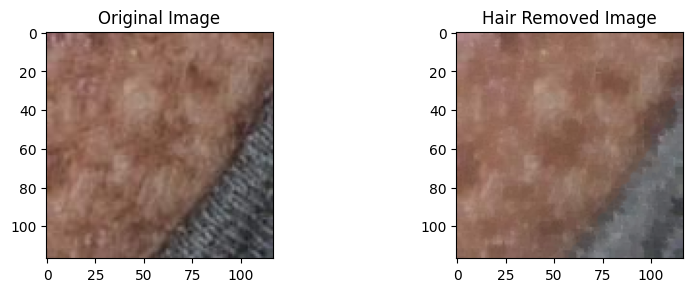

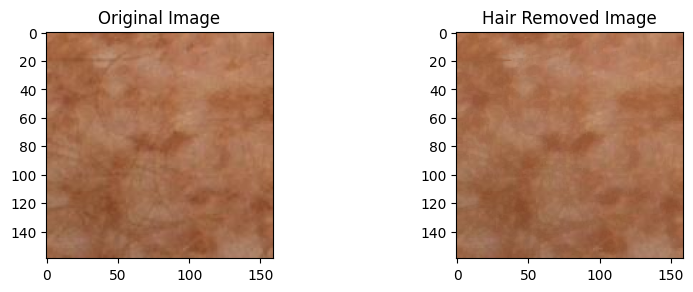

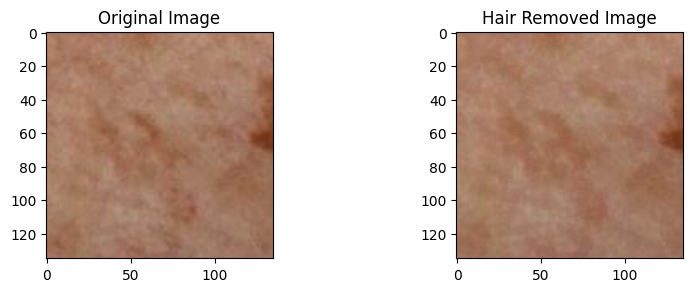

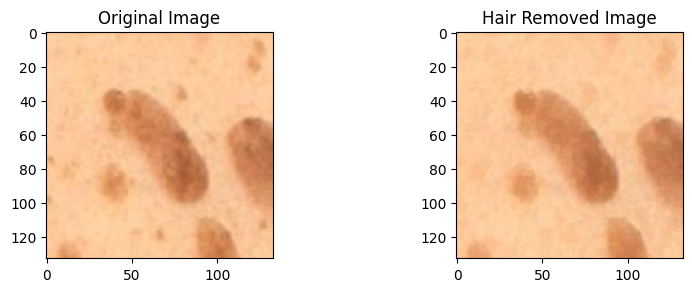

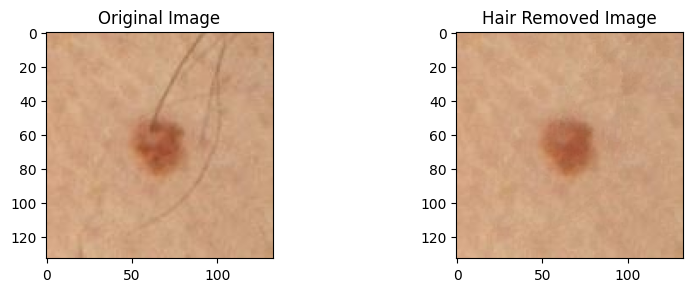

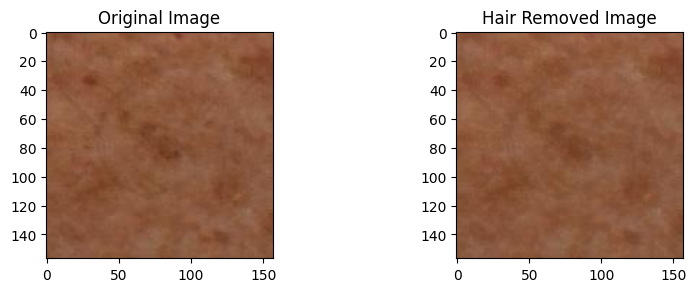

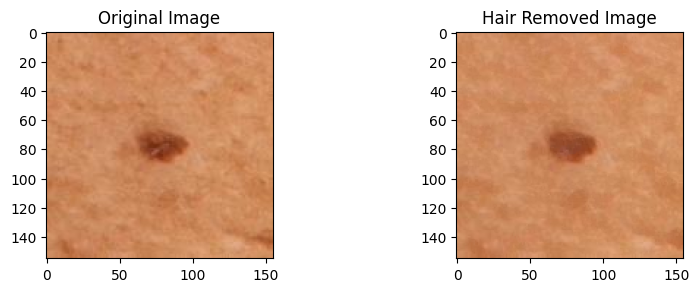

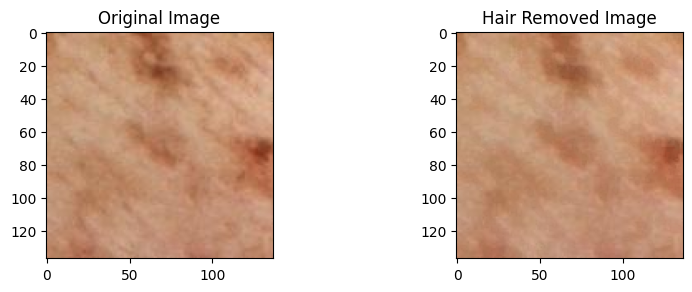

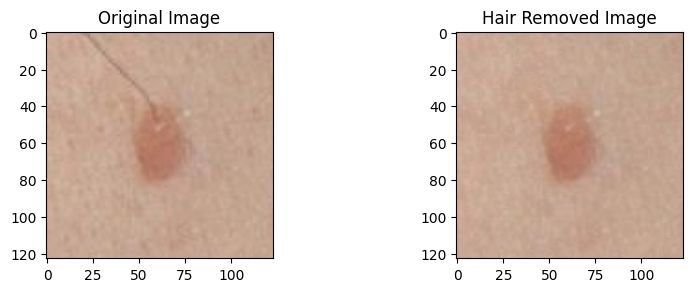

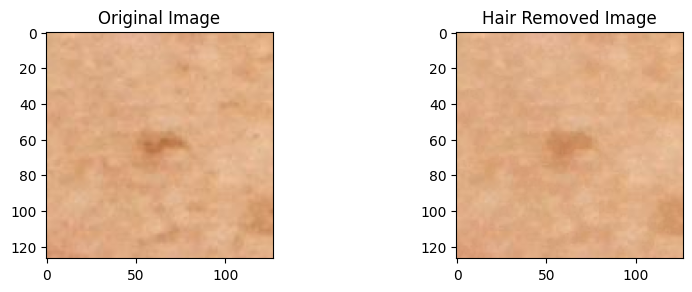

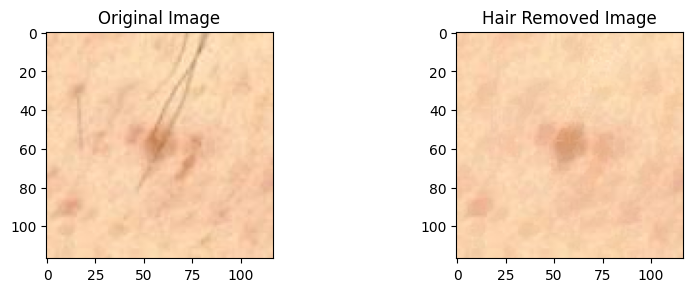

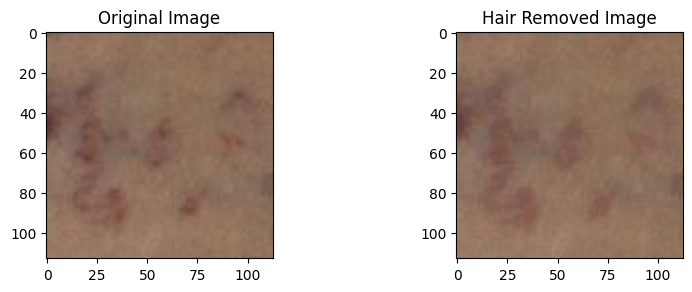

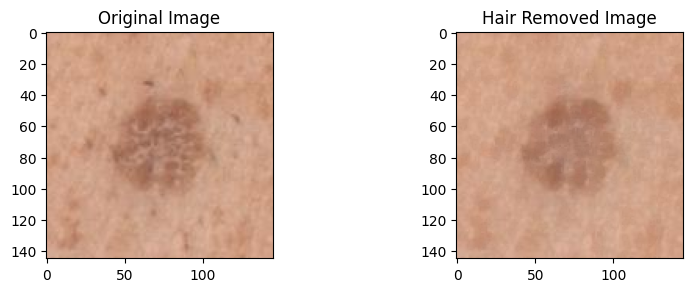

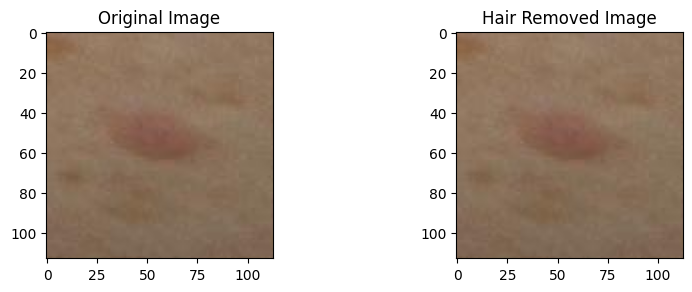

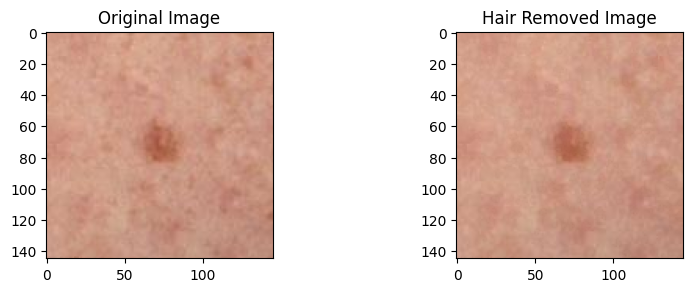

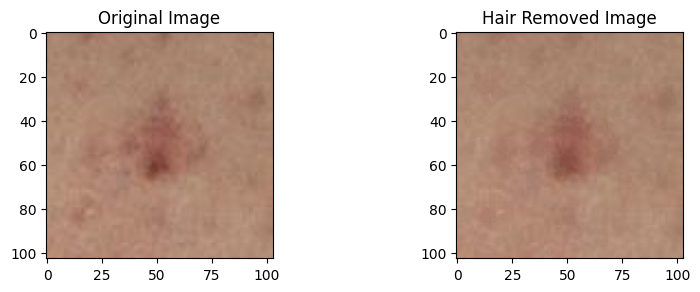

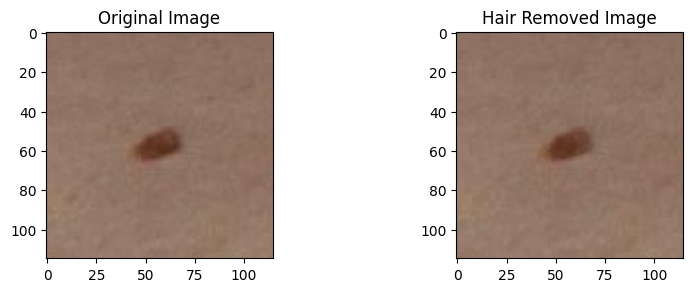

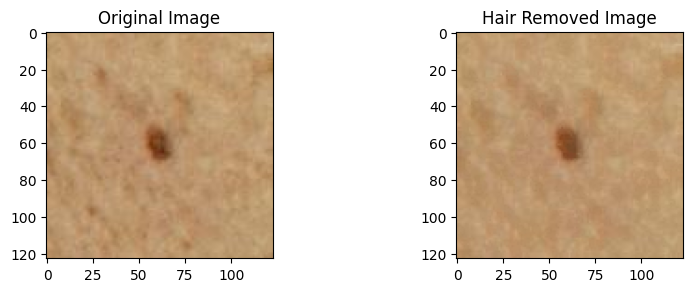

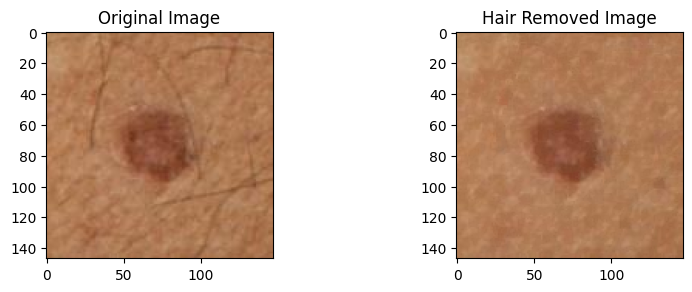

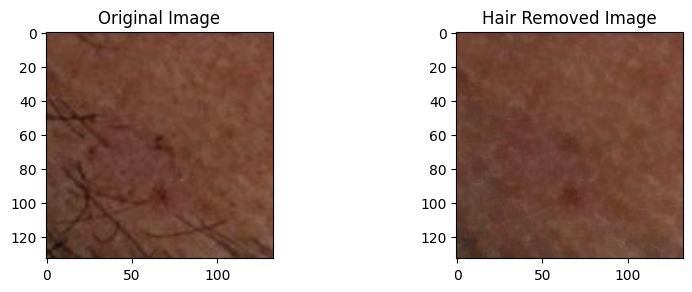

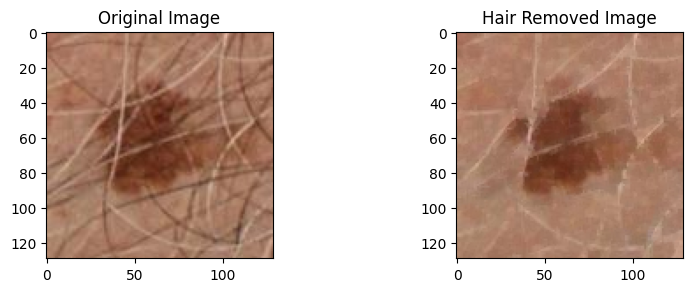

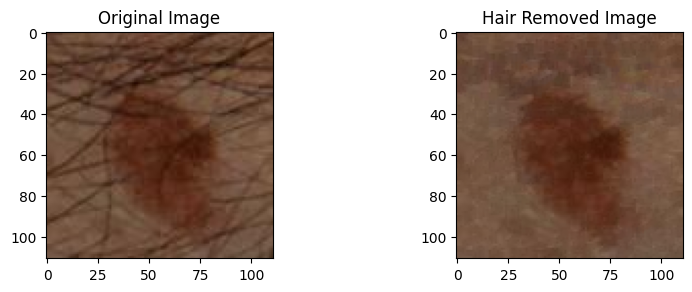

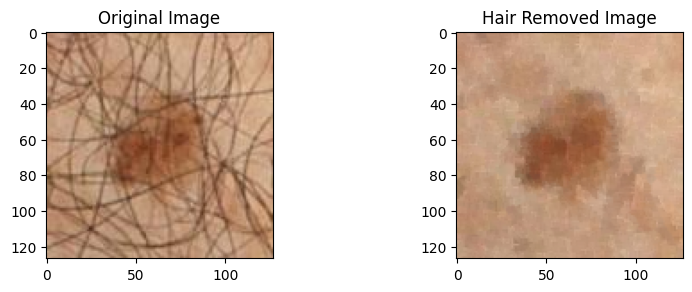

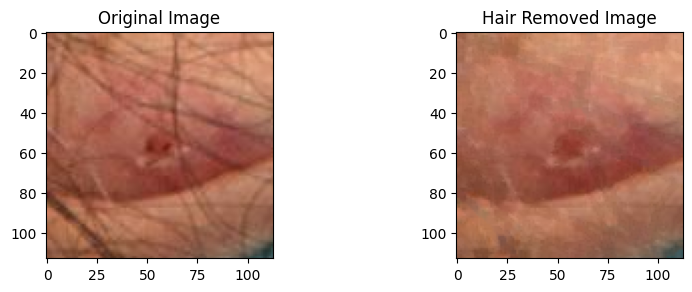

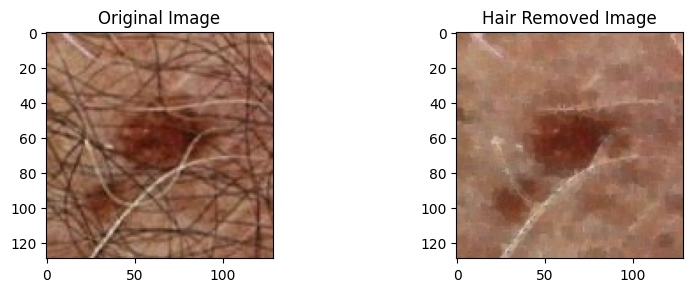

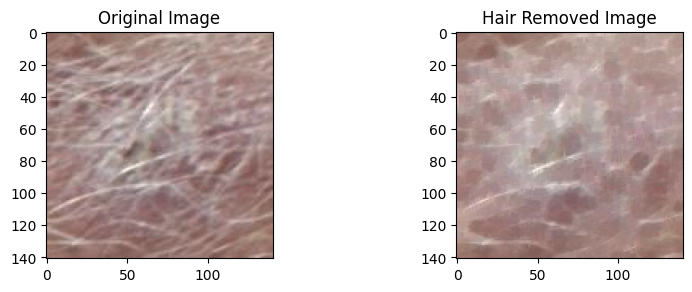

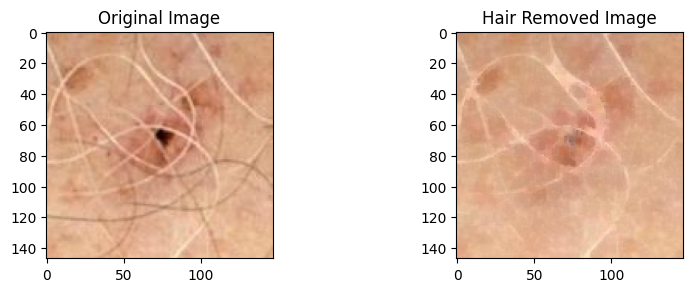

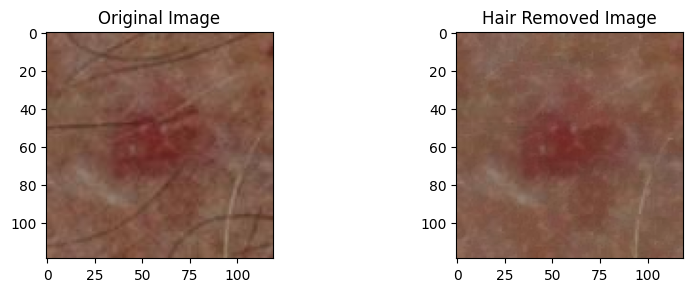

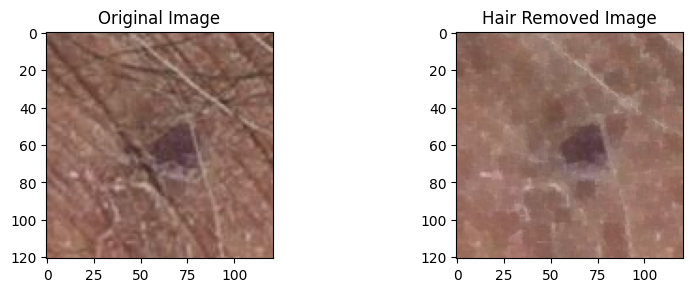

In [34]:
hair_removed_image = []
for image in rgb_images:
    hair_removed_image.append(remove_hair(image))


In [35]:
def process_image(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        
    # 1. Noise Reduction

    plt.figure(figsize=(15, 10))

    plt.subplot(3, 3, 1)
    plt.title('Original Image')
    plt.imshow(image)

    image = noise_reduce(image)
    plt.subplot(3, 3, 2)
    plt.title('Noise Reduced Image')
    plt.imshow(image)
    
    # 2. Contrast Enhanacement
    image = contrast_enhance(image)
    plt.subplot(3, 3, 3)
    plt.title('Contrast Enhancement Image')
    plt.imshow(image)
    
    # # 3. Edge Detection
    # edges = edge_detection(image)
    # plt.subplot(3, 3, 4)
    # plt.title('Edge Detection Image')
    # plt.imshow(edges, cmap='gray')
    
    # # 4. Image Smoothing and Sharpening
    # unsharp_image = cv2.addWeighted(image, 1.5, edges, -0.5, 0)
    # plt.subplot(3, 3, 5)
    # plt.title('Edge Detection Image')
    # plt.imshow(unsharp_image, cmap='gray')
    
    # # 5. Morphological Operations
    # kernel = np.ones((5,5), np.uint8)   
    # closing = cv2.morphologyEx(unsharp_image, cv2.MORPH_CLOSE, kernel)
    # plt.subplot(3, 3, 6)
    # plt.title('Morphological Operations Image')
    # plt.imshow(closing, cmap='gray')
    # # # 6. Normalization
    # # normalized_image = cv2.normalize(closing, None, 0, 255, cv2.NORM_MINMAX)
    
    plt.show()
    return image

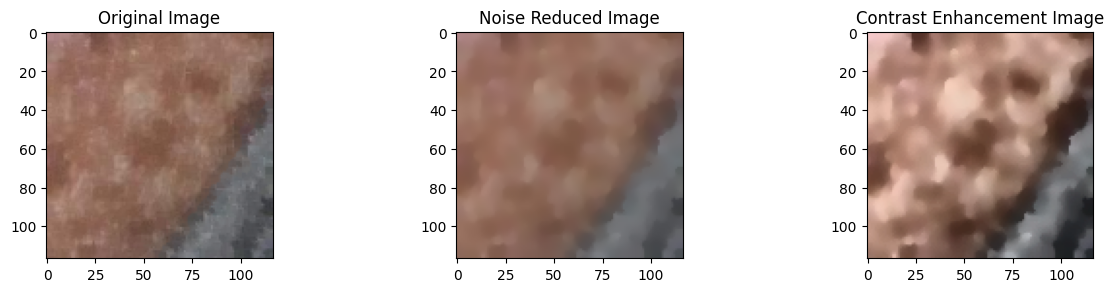

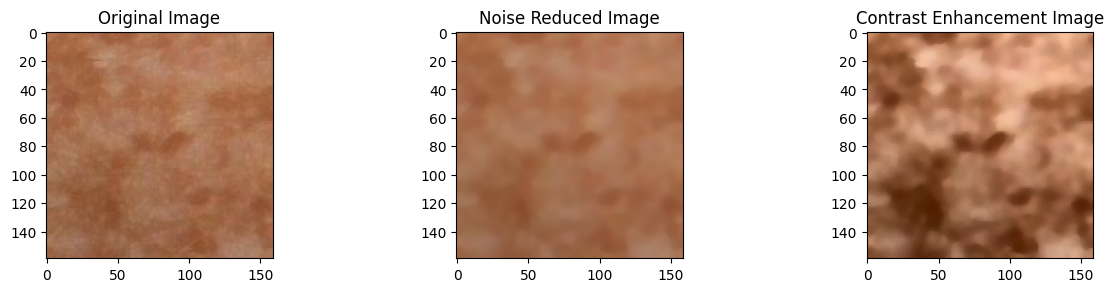

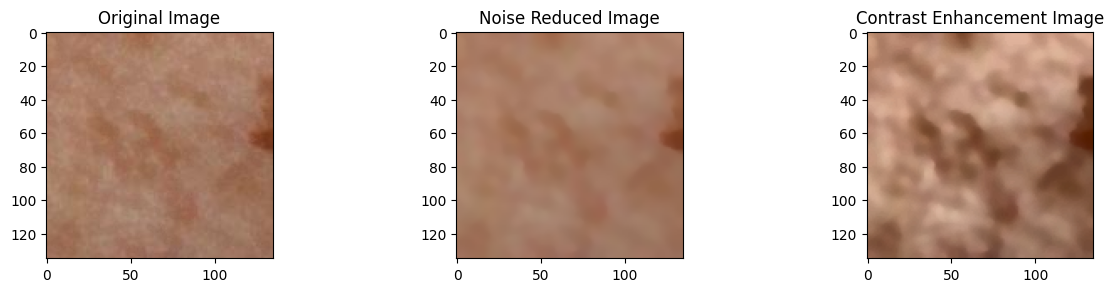

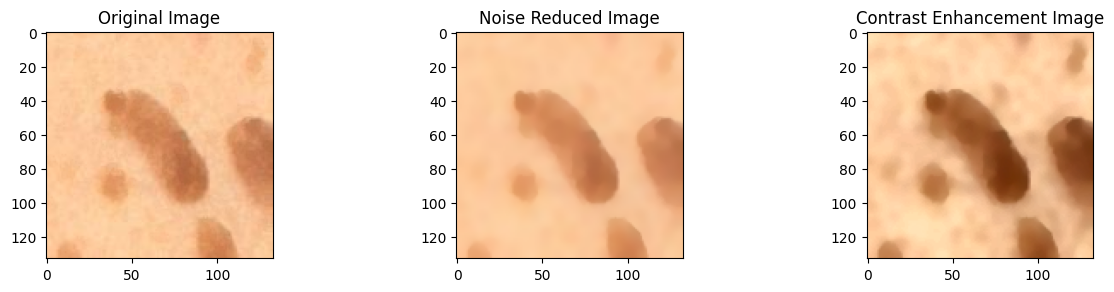

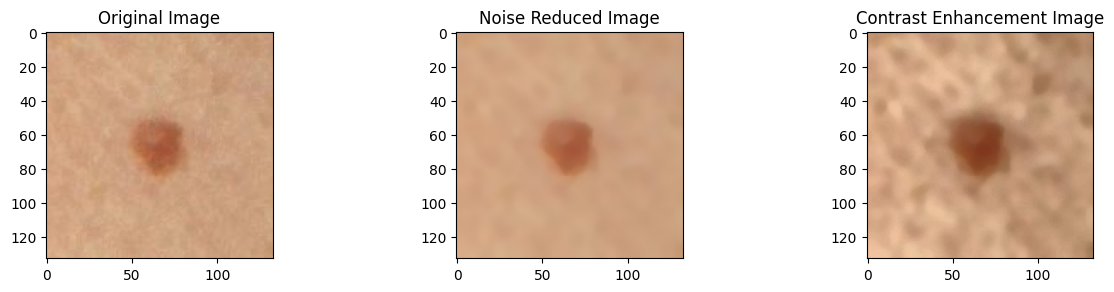

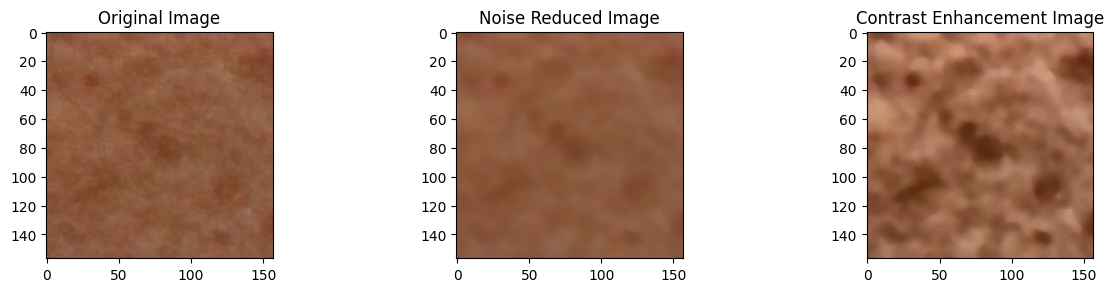

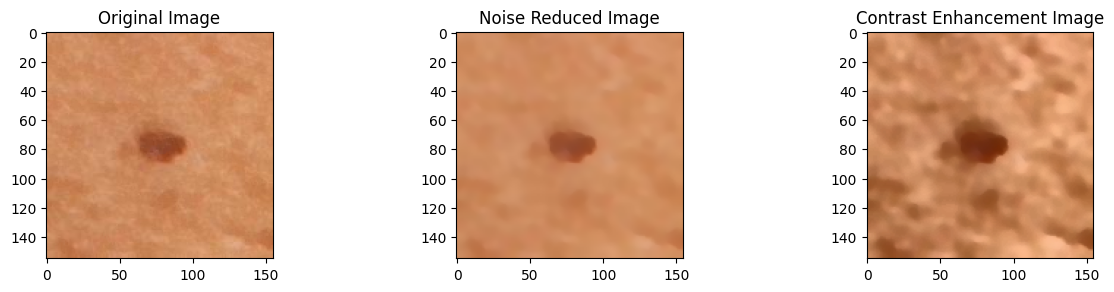

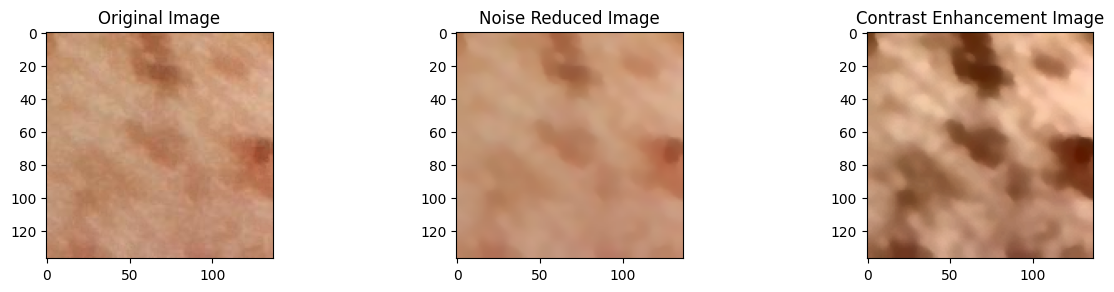

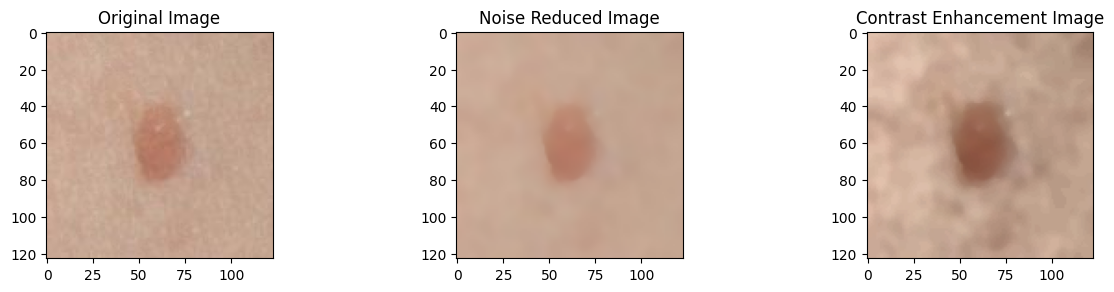

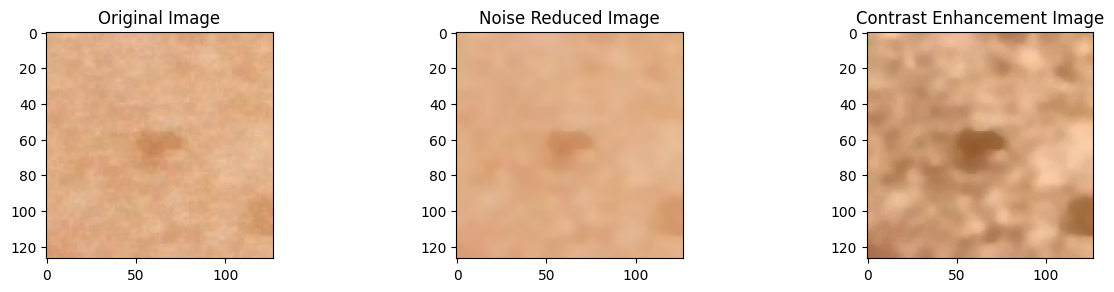

In [36]:
for image in hair_removed_image[:10]:
    process_image(image)
    

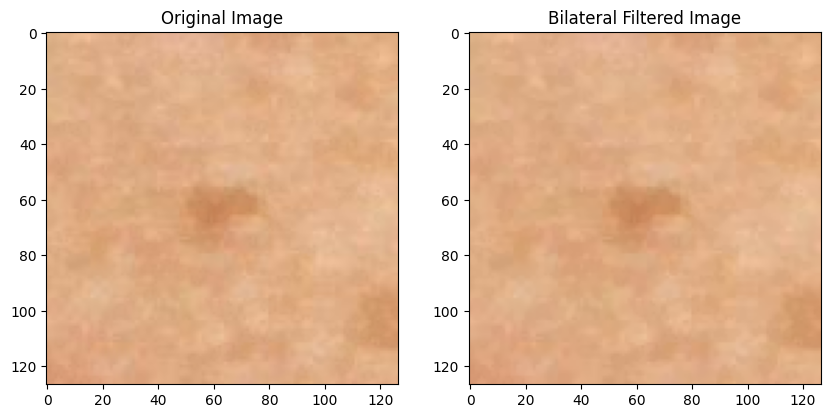

In [37]:
bilateral_filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=5, sigmaSpace=0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Bilateral Filtered Image')
plt.imshow(bilateral_filtered_image, cmap='gray')

plt.show()

In [38]:
gray_images = []
for img in images:
    gray_images.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    
def noise_reduce(image):
    image = cv2.medianBlur(image, 3)
    image = cv2.bilateralFilter(image, d=9, sigmaColor=30, sigmaSpace=30)
    return image

def contrast_enhance(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image = clahe.apply(image)
    return image

def edge_detection(image):
    return cv2.Canny(image, threshold1=50, threshold2=150)

def sharpening(image):
    return 

def process_image(image):
    # 1. Noise Reduction
    plt.figure(figsize=(15, 10))

    plt.subplot(3, 3, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')

    image = noise_reduce(image)
    plt.subplot(3, 3, 2)
    plt.title('Noise Reduced Image')
    plt.imshow(image, cmap='gray')
    
    # 2. Contrast Enhanacement
    image = contrast_enhance(image)
    plt.subplot(3, 3, 3)
    plt.title('Contrast Enhancement Image')
    plt.imshow(image, cmap='gray')
    
    # 3. Edge Detection
    edges = edge_detection(image)
    plt.subplot(3, 3, 4)
    plt.title('Edge Detection Image')
    plt.imshow(edges, cmap='gray')
    
    # 4. Image Smoothing and Sharpening
    unsharp_image = cv2.addWeighted(image, 1.5, edges, -0.5, 0)
    plt.subplot(3, 3, 5)
    plt.title('Edge Detection Image')
    plt.imshow(unsharp_image, cmap='gray')
    
    # 5. Morphological Operations
    kernel = np.ones((5,5), np.uint8)   
    closing = cv2.morphologyEx(unsharp_image, cv2.MORPH_CLOSE, kernel)
    plt.subplot(3, 3, 6)
    plt.title('Morphological Operations Image')
    plt.imshow(closing, cmap='gray')
    # # 6. Normalization
    # normalized_image = cv2.normalize(closing, None, 0, 255, cv2.NORM_MINMAX)
    
    plt.show()
    return image